# Plotting Read Time Comparisons Across Data Formats

This notebook compares reading times of Zarr, Zarr being opened with Xarray, netCDF-3, netCDF-4 and netCDF-4 Classic data formats. The data used in this example is publicly avaliable from Unidata [example files](https://www.unidata.ucar.edu/software/netcdf/examples/files.html). 
The file is from the Community Climate System Model (CCSM) with one time step of precipitation flux, air temperature, and eastward wind.

The data was converted from netCDF-3 to Zarr using [this repository](https://github.com/jonahjoughin/netcdf-to-zarr). The netCDF-4 files were created from the original example file using Unidata's [nccopy utility](https://www.unidata.ucar.edu/software/netcdf/workshops/2011/utilities/Nccopy.html). 

This example stores each variable/array as a single chunk in both Zarr and netCDF formats. Six variables are read including 1D, 3D, and 4D arrays, each stored in one chunk per array. Run times are recorded in seconds using `timeit` with the average taken of 100 excecutions.



## Timing netCDF-4 with HDF5 version 1.8

In [1]:
import timeit 
  
# import before timing begins 
imports = "import netCDF4 as nc"
  
# reading code to be timed
nc4_18_single_values = ''' 

# netCDF-4 with zlib compression 
dataset = nc.Dataset('Data/ccsm3_netcdf-4-18.nc')

# reading single values
tas = dataset.variables['tas'][0][0][0] # air temperature
plev = dataset.variables['plev'][0] # air pressure
pr = dataset.variables['pr'][0][0][0] # precipitation flux
ua = dataset.variables['ua'][0][0][0][0] # eastward wind with 17 levels of plev
lons = dataset.variables['lon'][0]
lat = dataset.variables['lat'][0]

dataset.close() 
'''
    
nc4_18_full_vars = ''' 
# netCDF-4 with zlib compression 
dataset = nc.Dataset('Data/ccsm3_netcdf-4-18.nc')

# reading full variables
tas = dataset.variables['tas'][:] # air temperature
plev = dataset.variables['plev'][:] # air pressure
pr = dataset.variables['pr'][:] # precipitation flux
ua = dataset.variables['ua'][:] # eastward wind with 17 levels of plev
lons = dataset.variables['lon'][:]
lat = dataset.variables['lat'][:]

dataset.close() 
'''

# timeit statement in seconds average of 1000
nc4_18_single_values_time = (timeit.timeit(setup = imports,
                     stmt = nc4_18_single_values,
                     number = 100)) / 100

nc4_18_full_vars_time = (timeit.timeit(setup = imports,
                     stmt = nc4_18_full_vars,
                     number = 100)) / 100

print(nc4_18_single_values_time)
print(nc4_18_full_vars_time)

0.017262876910000103
0.01723115914999994


## Timing netCDF-4 with HDF5 version 1.10

In [2]:
import timeit 
  
# import before timing begins 
imports = "import netCDF4 as nc"
  
# reading code to be timed
nc4_110_single_values = ''' 

# netCDF-4 with zlib compression 
dataset = nc.Dataset('Data/ccsm3_netcdf-4.nc')

# reading single values
tas = dataset.variables['tas'][0][0][0] # air temperature
plev = dataset.variables['plev'][0] # air pressure
pr = dataset.variables['pr'][0][0][0] # precipitation flux
ua = dataset.variables['ua'][0][0][0][0] # eastward wind with 17 levels of plev
lons = dataset.variables['lon'][0]
lat = dataset.variables['lat'][0]

dataset.close() 
'''
    
nc4_110_full_vars = ''' 
# netCDF-4 with zlib compression 
dataset = nc.Dataset('Data/ccsm3_netcdf-4.nc')

# reading full variables
tas = dataset.variables['tas'][:] # air temperature
plev = dataset.variables['plev'][:] # air pressure
pr = dataset.variables['pr'][:] # precipitation flux
ua = dataset.variables['ua'][:] # eastward wind with 17 levels of plev
lons = dataset.variables['lon'][:]
lat = dataset.variables['lat'][:]

dataset.close() 
'''

# timeit statement in seconds average of 1000
nc4_110_single_values_time = (timeit.timeit(setup = imports,
                     stmt = nc4_110_single_values,
                     number = 100)) / 100

nc4_110_full_vars_time = (timeit.timeit(setup = imports,
                     stmt = nc4_110_full_vars,
                     number = 100)) / 100

print(nc4_110_single_values_time)
print(nc4_110_full_vars_time)

0.01700342102999997
0.017802580350000027


## Timing netCDF-4 Classic

In [3]:
import timeit 
  
# import before timing begins 
imports = "import netCDF4 as nc"
  
# reading code to be timed
nc4C_single_values = ''' 

# netCDF-4 with zlib compression 
dataset = nc.Dataset('Data/ccsm3_netcdf-4-classic.nc')

# reading single values
tas = dataset.variables['tas'][0][0][0] # air temperature
plev = dataset.variables['plev'][0] # air pressure
pr = dataset.variables['pr'][0][0][0] # precipitation flux
ua = dataset.variables['ua'][0][0][0][0] # eastward wind with 17 levels of plev
lons = dataset.variables['lon'][0]
lat = dataset.variables['lat'][0]

dataset.close() 
'''

nc4C_full_vars = ''' 
# netCDF-4 with zlib compression 
dataset = nc.Dataset('Data/ccsm3_netcdf-4-classic.nc')

# reading full variables
tas = dataset.variables['tas'][:] # air temperature
plev = dataset.variables['plev'][:] # air pressure
pr = dataset.variables['pr'][:] # precipitation flux
ua = dataset.variables['ua'][:] # eastward wind with 17 levels of plev
lons = dataset.variables['lon'][:]
lat = dataset.variables['lat'][:]

dataset.close() 
'''
    
# timeit statement in seconds average of 1000
nc4C_single_values_time = (timeit.timeit(setup = imports,
                     stmt = nc4C_single_values,
                     number = 100)) / 100

nc4C_full_vars_time = (timeit.timeit(setup = imports,
                     stmt = nc4C_full_vars,
                     number = 100)) / 100

print(nc4C_single_values_time)
print(nc4C_full_vars_time)

0.0172523619399999
0.015702857770000092


## Timing netCDF-3


In [4]:
import timeit 
  
# import before timing begins 
imports = "import netCDF4 as nc"
  
# reading code to be timed
nc3_single_values = ''' 
dataset = nc.Dataset('Data/sresa1b_ncar_ccsm3-example.nc')

# reading single values
tas = dataset.variables['tas'][0][0][0] # air temperature
plev = dataset.variables['plev'][0] # air pressure
pr = dataset.variables['pr'][0][0][0] # precipitation flux
ua = dataset.variables['ua'][0][0][0][0] # eastward wind with 17 levels of plev
lons = dataset.variables['lon'][0]
lat = dataset.variables['lat'][0]

dataset.close()
'''

nc3_full_vars = ''' 
dataset = nc.Dataset('Data/sresa1b_ncar_ccsm3-example.nc')

# reading full variables
tas = dataset.variables['tas'][:] # air temperature
plev = dataset.variables['plev'][:] # air pressure
pr = dataset.variables['pr'][:] # precipitation flux
ua = dataset.variables['ua'][:] # eastward wind with 17 levels of plev
lons = dataset.variables['lon'][:]
lat = dataset.variables['lat'][:]

dataset.close()
'''
    
# timeit statement in seconds average of 1000
nc3_single_values_time = (timeit.timeit(setup = imports,
                     stmt = nc3_single_values,
                     number = 100)) / 100

nc3_full_vars_time = (timeit.timeit(setup = imports,
                     stmt = nc3_full_vars,
                     number = 100)) / 100

print(nc3_single_values_time)
print(nc3_full_vars_time)

0.0032087253700001385
0.0028011846900000137


## Timing Zarr directory store

In [5]:
import timeit 
  
# import before timing begins 
imports = "import zarr"
  
# reading code to be timed
zarr_single_values = ''' 
zarrData = zarr.open('Data/ccsm3_store.zarr', mode='r')

# reading single values 
tas = zarrData['tas'][0][0][0] # air temperature
plev = zarrData['plev'][0] # air pressure
pr = zarrData['pr'][0][0][0] # precipitation flux
ua = zarrData['ua'][0][0][0][0] # eastward wind with 17 levels of plev
lon = zarrData['lon'][0]
lat = zarrData['lat'][0]
'''

zarr_full_vars = '''  
zarrData = zarr.open('Data/ccsm3_store.zarr', mode='r')

# reading full variables
tas = zarrData['tas'][:] # air temperature
plev = zarrData['plev'][:] # air pressure
pr = zarrData['pr'][:] # precipitation flux
ua = zarrData['ua'][:] # eastward wind with 17 levels of plev
lon = zarrData['lon'][:]
lat = zarrData['lat'][:]
'''
  
# timeit statement in seconds average of 1000
zarr_single_values_time = (timeit.timeit(setup = imports,
                     stmt = zarr_single_values,
                     number = 100)) / 100

zarr_full_vars_time = (timeit.timeit(setup = imports,
                     stmt = zarr_full_vars,
                     number = 100)) / 100
print(zarr_single_values_time)
print(zarr_full_vars_time)

0.0026213747700001024
0.0021559600700001625


## Timing Zarr directory store read with Xarray

In [6]:
import timeit 
  
# import before timing begins 
imports = '''
import xarray as xr
import zarr
'''
  
# reading code to be timed
zarrXr_single_values = ''' 
zarrData = xr.open_zarr('Data/ccsm3_store.zarr')

# reading single values 
tas = zarrData['tas'][0][0][0] # air temperature
plev = zarrData['plev'][0] # air pressure
pr = zarrData['pr'][0][0][0] # precipitation flux
ua = zarrData['ua'][0][0][0][0] # eastward wind with 17 levels of plev
lon = zarrData['lon'][0]
lat = zarrData['lat'][0]
'''

zarrXr_full_vars = '''  
zarrData = xr.open_zarr('Data/ccsm3_store.zarr')

# reading full variables
tas = zarrData['tas'][:] # air temperature
plev = zarrData['plev'][:] # air pressure
pr = zarrData['pr'][:] # precipitation flux
ua = zarrData['ua'][:] # eastward wind with 17 levels of plev
lon = zarrData['lon'][:]
lat = zarrData['lat'][:]
'''
  
# timeit statement in seconds average of 1000
zarrXr_single_values_time = (timeit.timeit(setup = imports,
                     stmt = zarrXr_single_values,
                     number = 100)) / 100

zarrXr_full_vars_time = (timeit.timeit(setup = imports,
                     stmt = zarrXr_full_vars,
                     number = 100)) / 100
print(zarrXr_single_values_time)
print(zarrXr_full_vars_time)

/opt/anaconda3/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'pr' has multiple fill values {0.0, 1.0000000200408773e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/anaconda3/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tas' has multiple fill values {0.0, 1.0000000200408773e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/opt/anaconda3/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'ua' has multiple fill values {0.0, 1.0000000200408773e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


0.014713535320000233
0.013016692699999909


## Plotting

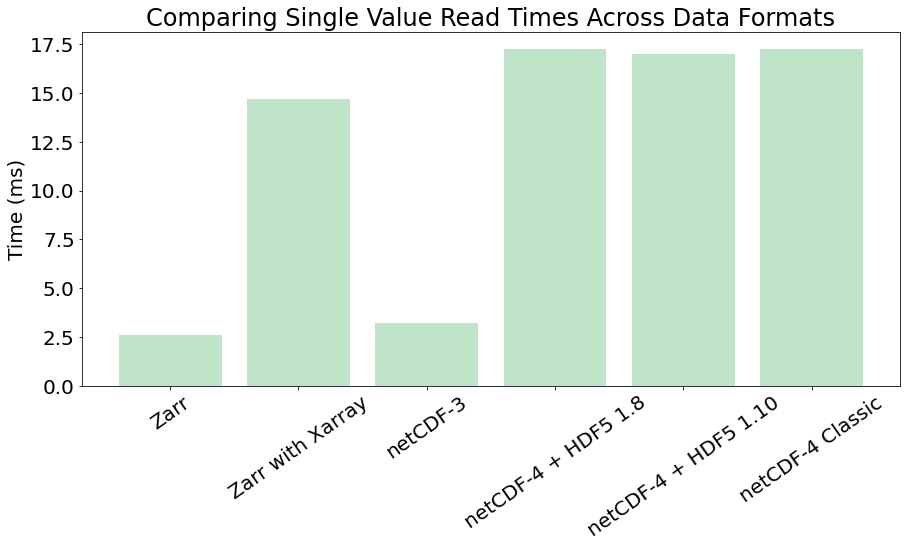

In [17]:
import matplotlib.pyplot as plt
import numpy as np

objects = ('Zarr', 'Zarr with Xarray', 'netCDF-3', 'netCDF-4 + HDF5 1.8', 'netCDF-4 + HDF5 1.10', 'netCDF-4 Classic')
y_pos = np.arange(len(objects))
performance = [zarr_single_values_time * 1000, 
               zarrXr_single_values_time * 1000,
               nc3_single_values_time * 1000, 
               nc4_18_single_values_time * 1000, 
               nc4_110_single_values_time * 1000,
               nc4C_single_values_time * 1000]

f = plt.figure()
f.set_figwidth(13)
f.set_figheight(8)

plt.bar(y_pos, performance, align='center', alpha=0.5, width = .8 , color = '#83CA93')
plt.xticks(y_pos, objects)
plt.ylabel('Time (ms)')
plt.title('Comparing Single Value Read Times Across Data Formats', fontsize=24)
plt.rcParams.update({'font.size': 20})

plt.tick_params( axis='x', labelrotation = 35)
plt.tight_layout()
plt.savefig('Plots/Single_val_read.jpg')

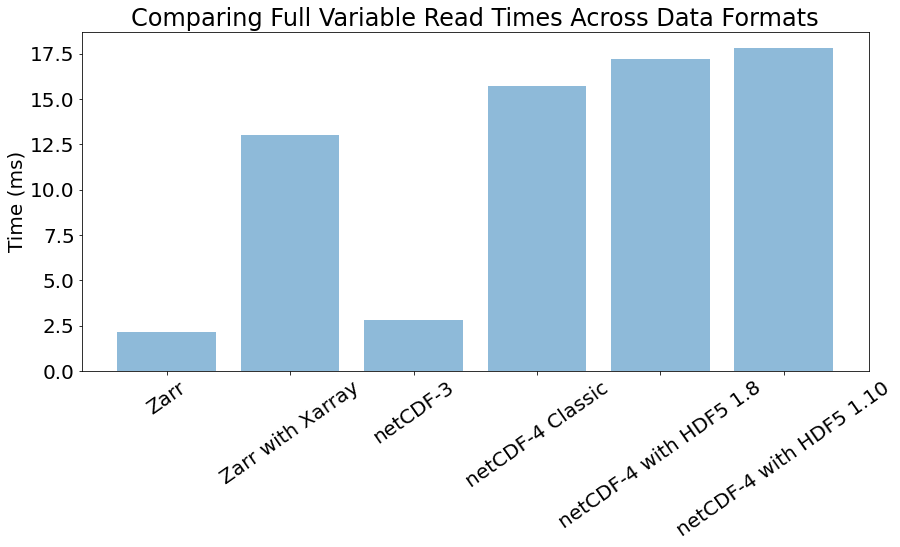

In [16]:
import matplotlib.pyplot as plt
import numpy as np

objects = ('Zarr', 'Zarr with Xarray', 'netCDF-3', 'netCDF-4 Classic', 'netCDF-4 with HDF5 1.8', 'netCDF-4 with HDF5 1.10' )
y_pos = np.arange(len(objects))
performance = [zarr_full_vars_time * 1000, 
               zarrXr_full_vars_time * 1000,
               nc3_full_vars_time * 1000, 
               nc4C_full_vars_time * 1000,
               nc4_18_full_vars_time * 1000, 
               nc4_110_full_vars_time * 1000]

f = plt.figure()
f.set_figwidth(13)
f.set_figheight(8)

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Time (ms)')
plt.title('Comparing Full Variable Read Times Across Data Formats')
plt.tick_params( axis='x', labelrotation = 35)
plt.rcParams.update({'font.size': 20})
plt.tight_layout()

plt.savefig('Plots/Full_var_read.jpg')